# Project Overview

This project involves a classification problem where the objective is to predict the values in the "group" column, which can either be "control" or "patient." The dataset includes the following columns: "rownames," "subject," "age," and "group."

rownames: A unique identifier for each record in the dataset, often used as an index.

subject: Represents the identifier or label for the individuals or entities being studied.

age: Indicates the age of the subjects in the dataset.

group: The target variable for the classification problem, categorizing each subject as either "control" or "patient."

# Data Understanding

Loading and Inspecting the Dataset

In [1]:
import pandas as pd

# Raw URL to the Blackmore.csv file
raw_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/carData/Blackmore.csv"

# Load the CSV directly into pandas
data = pd.read_csv(raw_url)
print(data.head())

   rownames subject    age  exercise    group
0         1     100   8.00      2.71  patient
1         2     100  10.00      1.94  patient
2         3     100  12.00      2.36  patient
3         4     100  14.00      1.54  patient
4         5     100  15.92      8.63  patient


In [2]:
#display the first 5 rows of our dataset
data.head()

,rownames,subject,age,exercise,group
0,1,100,8.00,2.71,patient
1,2,100,10.00,1.94,patient
2,3,100,12.00,2.36,patient
3,4,100,14.00,1.54,patient
4,5,100,15.92,8.63,patient


In [3]:
#display the last 5 rows of our dataset
data.tail()

,rownames,subject,age,exercise,group
940,768,286,8.0,1.10,control
941,769,286,10.0,1.10,control
942,770,286,12.0,0.35,control
943,771,286,14.0,0.40,control
944,772,286,17.0,0.29,control


In [4]:
#display information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  945 non-null    int64  
 1   subject   945 non-null    object 
 2   age       945 non-null    float64
 3   exercise  945 non-null    float64
 4   group     945 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 37.0+ KB


In [5]:
#display number of rows and columns in our dataset. 
#there are 945 rows and 5 columns
data.shape

(945, 5)

In [6]:
#display a statistical summary of our dataset
data.describe()

,rownames,age,exercise
count,945.000000,945.000000,945.000000
mean,473.000000,11.441661,2.530646
std,272.942302,2.765609,3.495086
min,1.000000,8.000000,0.000000
25%,237.000000,10.000000,0.400000
50%,473.000000,12.000000,1.330000
75%,709.000000,14.000000,3.040000
max,945.000000,17.920000,29.960000


In [7]:
#display the columns in or dataset
data.columns

Index(['rownames', 'subject', 'age', 'exercise', 'group'], dtype='object')

Column names description;


rownames: A unique identifier for each record in the dataset, often used as an index.

subject: Represents the identifier or label for the individuals or entities being studied.

age: Indicates the age of the subjects in the dataset.

group: The target variable for the classification problem, categorizing each subject as either "control" or "patient."

In [8]:
#display the datatypes for each column
data.dtypes

rownames      int64
subject      object
age         float64
exercise    float64
group        object
dtype: object

# Data Preparation

## Data Cleaning

### Check for missing values

In [9]:
#check for missing values
data.isnull().sum()

rownames    0
subject     0
age         0
exercise    0
group       0
dtype: int64

From our observation above, our dataset does not have any missing values.

In [10]:
#checking if our dataset has any duplicates
data.duplicated().sum()

0

Our dataset does not have any duplicated values. It is neccessary to check for duplicates to ensure our dataset is clean and avoid any misleading information

### Check for Outliers

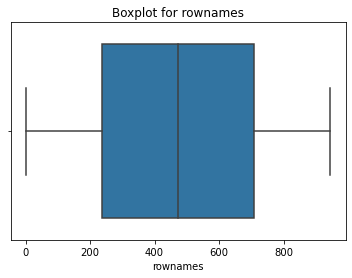

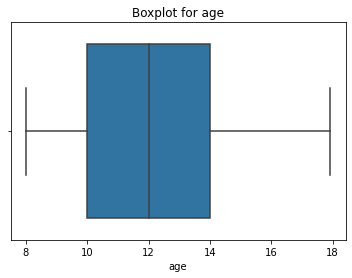

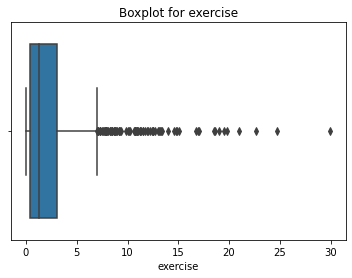

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

The 'exercise' column seems to have outliers, and if not dealth with, it can lead to misinterpretation of results

Calculate the interquartile range (to define and identify outliers in the exercise

In [12]:
import pandas as pd

# Calculate IQR
Q1 = data['exercise'].quantile(0.25)  # 25th percentile
Q3 = data['exercise'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['exercise'] < lower_bound) | (data['exercise'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")


Number of outliers: 83


Our dataset only has 83 outliers. Removing the outliers will not significantly affect our dataset

In [13]:
data_cleaned = data[(data['exercise'] >= lower_bound) & (data['exercise'] <= upper_bound)]
print(f"Dataframe size after removing outliers: {data_cleaned.shape}")


Dataframe size after removing outliers: (862, 5)


The shape of our dataset changes after removing the 83 outliers

The number of rows changes from 945 to 862

The number of columns remains the same

In [14]:
#checking the number of outliers after remmoving the outliers
outliers_after_removal = data_cleaned[(data_cleaned['exercise'] < lower_bound) | (data_cleaned['exercise'] > upper_bound)]
print(f"Number of outliers after removal: {outliers_after_removal.shape[0]}")


Number of outliers after removal: 0


In [15]:
# Display the DataFrame without the index in the output
print(data.head().to_string(index=True))

   rownames subject    age  exercise    group
0         1     100   8.00      2.71  patient
1         2     100  10.00      1.94  patient
2         3     100  12.00      2.36  patient
3         4     100  14.00      1.54  patient
4         5     100  15.92      8.63  patient


In [16]:
#set rownames to index
data.set_index('rownames', inplace=True)

In [17]:
#display to confirm that the index has been set correctly
data.head()

,subject,age,exercise,group
rownames,,,,
1,100,8.00,2.71,patient
2,100,10.00,1.94,patient
3,100,12.00,2.36,patient
4,100,14.00,1.54,patient
5,100,15.92,8.63,patient


In [18]:
# Convert 'subject' column to numeric, invalid parsing will become NaN
data['subject'] = pd.to_numeric(data['subject'], errors='coerce')
data.head()

,subject,age,exercise,group
rownames,,,,
1,100.0,8.00,2.71,patient
2,100.0,10.00,1.94,patient
3,100.0,12.00,2.36,patient
4,100.0,14.00,1.54,patient
5,100.0,15.92,8.63,patient


# Visualization

## Univariate Analysis

#### Age and Exercise Columns

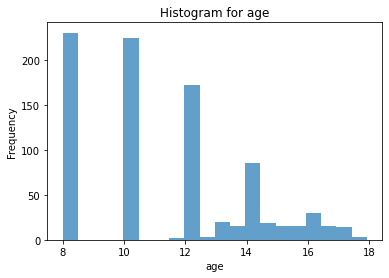

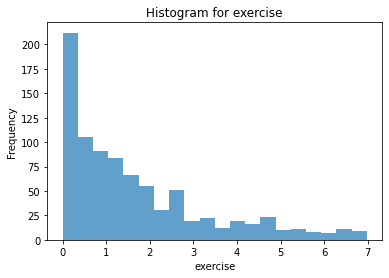

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plot histograms for numerical columns
numerical_columns = ['age', 'exercise']
for col in numerical_columns:
    data_cleaned[col].plot(kind='hist', bins=20, alpha=0.7, title=f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


High Frequency in Specific Age Groups:

The first two age groups (younger ages) have the highest frequencies, suggesting these age groups dominate the dataset.

Decreasing Frequency with Age:

As age increases, the frequency drops significantly, meaning there are fewer individuals in the older age groups.

Skewed Distribution:

The distribution is  right-skewed, with the majority of individuals concentrated in the younger age groups and fewer as age increases.




High Frequency in Young Ages:

The first bar (representing the youngest age group) has the highest frequency, indicating that most individuals are in this age range.

Steady Decline:

As age increases, the frequency steadily decreases, forming a downward-sloping distribution.
This suggests that older age groups become progressively less frequent in the dataset.

Right-Skewed Distribution:

This graph shows a classic right-skewed distribution, where the data is concentrated in younger ages and thins out as age increases.

#### Group Column

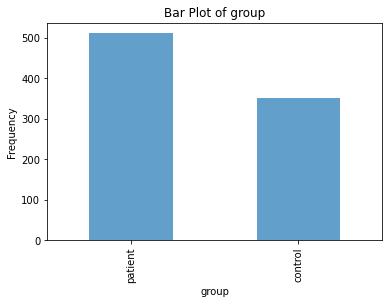

In [20]:
# Bar plots for categorical variables
categorical_columns = ['group']
for col in categorical_columns:
    data_cleaned[col].value_counts().plot(kind='bar', alpha=0.7, title=f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In our dataset, there are two distinct groups i.e patient and control whether a subject belongs to the control group (healthy) or the patient group (with a condition) 

#### Subject Column

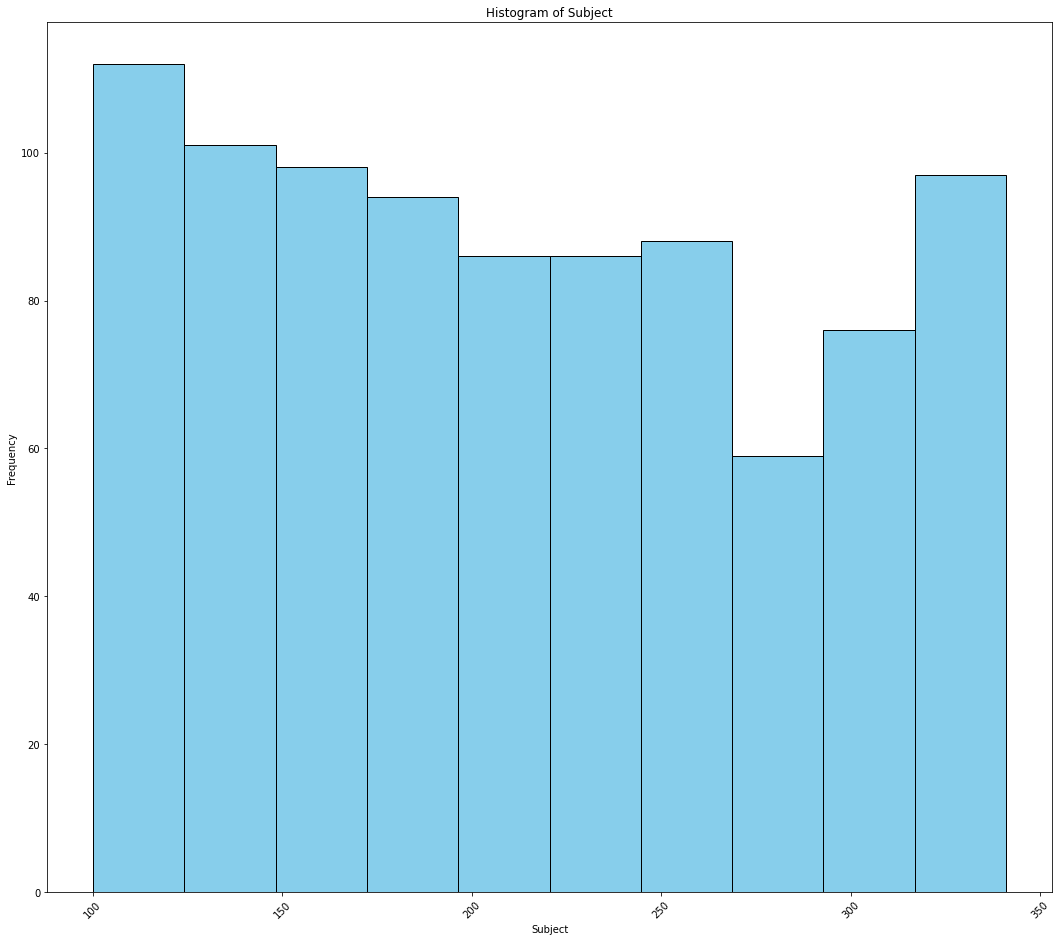

In [21]:
import matplotlib.pyplot as plt

# Assuming 'subject' is a numeric column
plt.figure(figsize=(18, 16))
plt.hist(data['subject'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Subject')
plt.xlabel('Subject')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The bars in the histogram appear to have similar heights, except for a noticeable dip in the middle and one or two taller bars toward the edges.

Interpretation: This suggests that the data is relatively evenly distributed across most ranges, but there are certain ranges with fewer values (e.g., the lower bar) and certain ranges with a slightly higher frequency (e.g., the taller bar).

## Bivariate Analysis

### Age vs Exercise

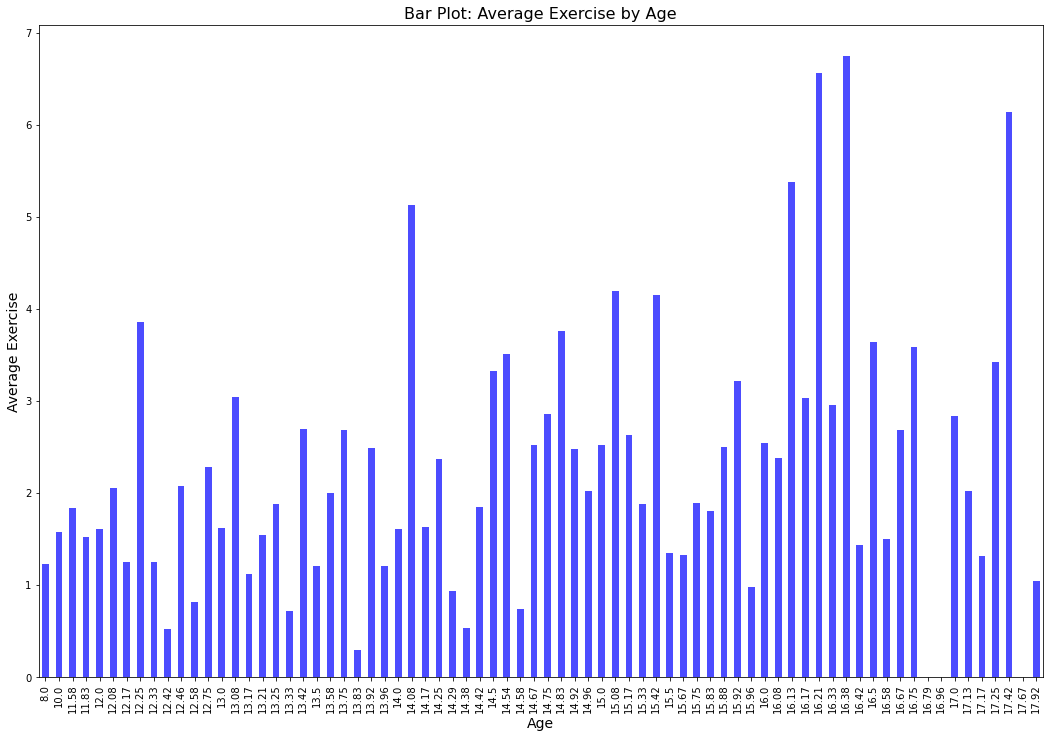

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping by age and calculating mean exercise
age_grouped = data_cleaned.groupby('age')['exercise'].mean()

# Set the figure size
plt.figure(figsize=(18, 12))

# Bar plot for mean exercise per age
age_grouped.plot(kind='bar', color='blue', alpha=0.7)

# Adding plot title and labels
plt.title('Bar Plot: Average Exercise by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Exercise', fontsize=14)

# Show the plot
plt.show()


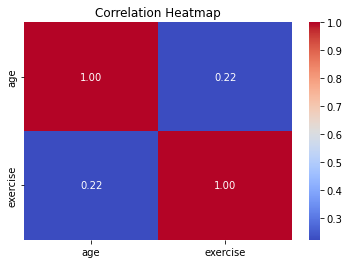

In [23]:
# Correlation matrix
correlation_matrix = data_cleaned[['subject', 'age', 'exercise']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')
plt.show()


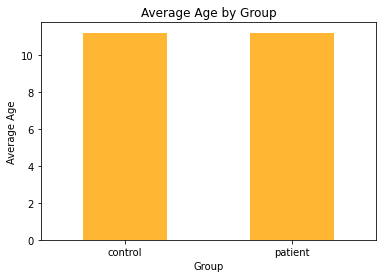

In [24]:
# Grouping by 'group' and calculating the mean age
grouped_age = data_cleaned.groupby('group')['age'].mean()

# Bar chart
grouped_age.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Average Age by Group')
plt.xlabel('Group')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()


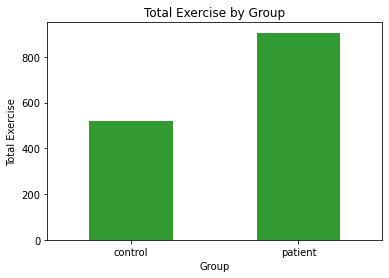

In [25]:
# Grouping by 'group' and summing up exercise
total_exercise = data_cleaned.groupby('group')['exercise'].sum()

# Bar chart
total_exercise.plot(kind='bar', color='green', alpha=0.8)
plt.title('Total Exercise by Group')
plt.xlabel('Group')
plt.ylabel('Total Exercise')
plt.xticks(rotation=0)
plt.show()


The control group engages in less exercise activity compared to the patient group, which has a total of approximately 900 and the control group with a total of 500

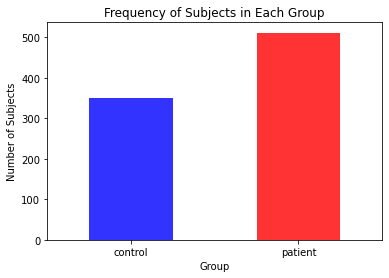

In [26]:
# Cross-tabulation of subject vs group
cross_tab = pd.crosstab(data_cleaned['subject'], data_cleaned['group'])

# Summing across rows for each group
subject_counts = cross_tab.sum()

# Bar chart
subject_counts.plot(kind='bar', color=['blue', 'red'], alpha=0.8)
plt.title('Frequency of Subjects in Each Group')
plt.xlabel('Group')
plt.ylabel('Number of Subjects')
plt.xticks(rotation=0)
plt.show()
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

The control group has around 350  subjects, where as the patient group has around 500 subjects.

## Data Preprocessing

### One Hot Encoding

Encode the contol and patient entries in the group column

In [27]:
# # Map the 'group' column to numerical values
# data["group"] = data["group"].map({"control": 0, "patient": 1})
# data.head()


In [28]:

# Drop any existing one-hot-encoded columns for 'group' if they exist
data = data.drop(columns=[col for col in data.columns if col.startswith("group_")], errors='ignore')

# Apply one-hot encoding
group_one_hot = pd.get_dummies(data["group"], prefix="group")
data = pd.concat([data, group_one_hot], axis=1)

# Drop the original 'group' column
data = data.drop(columns=["group"])

data.head()



,subject,age,exercise,group_control,group_patient
rownames,,,,,
1,100.0,8.00,2.71,0,1
2,100.0,10.00,1.94,0,1
3,100.0,12.00,2.36,0,1
4,100.0,14.00,1.54,0,1
5,100.0,15.92,8.63,0,1


### Standard Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data (make sure 'data' is a DataFrame)
scaled_data = scaler.fit_transform(data)

# Convert scaled data back to a DataFrame with correct column names
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

print(scaled_df.head())


    subject       age  exercise  group_control  group_patient
0 -1.595923 -1.245108  0.051343      -0.782706       0.782706
1 -1.595923 -0.521558 -0.169083      -0.782706       0.782706
2 -1.595923  0.201993 -0.048850      -0.782706       0.782706
3 -1.595923  0.925544 -0.283590      -0.782706       0.782706
4 -1.595923  1.620153  1.746047      -0.782706       0.782706


### Handling Class Imbalance Using SMOTE

In [36]:
scaled_df.isna().sum()

subject          48
age               0
exercise          0
group_control     0
group_patient     0
dtype: int64

In [38]:
# Drop rows with NaN values
data_cleaned = data.dropna()

# Split into features and target
X = data_cleaned.drop(columns=["group_control", "group_patient"])
y = data_cleaned["group_patient"]

# Continue with train-test split and SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Class distribution after SMOTE: \n{Counter(y_train_resampled)}")


Class distribution after SMOTE: 
Counter({1: 410, 0: 410})


In [39]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print(f"Class distribution before SMOTE: \n{y_train.value_counts()}")
print(f"Class distribution after SMOTE: \n{y_train_resampled.value_counts()}")




Class distribution before SMOTE: 
1    410
0    217
Name: group_patient, dtype: int64
Class distribution after SMOTE: 
1    410
0    410
Name: group_patient, dtype: int64


## Data Spliting

In [41]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
# Split the data into features (X) and target (y)
# Split into features and target
X = data_cleaned.drop(columns=["group_control", "group_patient"])
y = data_cleaned["group_patient"]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training features shape: (717, 3)
Testing features shape: (180, 3)
Training target shape: (717,)
Testing target shape: (180,)


# Modeling

## Baseline Model Logistic Regression Model

In [45]:
# Train the Logistic Regression model with the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = model.predict(X_test)


In [46]:
from sklearn.metrics import classification_report

# Print evaluation metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.58      0.76      0.66        59
           1       0.86      0.73      0.79       121

    accuracy                           0.74       180
   macro avg       0.72      0.74      0.72       180
weighted avg       0.77      0.74      0.75       180



Our base line model, Logistic Regression has an acuracy of 74%

Precision: How many of the predicted positives were actually correct.

Class 0: 58% correct.
Class 1: 86% correct.

Recall: How many of the actual positives were correctly identified.

Class 0: 76% found.
Class 1: 73% found.

F1-Score: Balance between precision and recall.

Class 0: 0.66.
Class 1: 0.79.

Support: Number of real cases for each class.

Class 0: 59 cases.
Class 1: 121 cases.

Accuracy: Model’s overall correctness (74%).


## Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Classifier Evaluation:")
print(classification_report(y_test, y_pred_rf))



Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.99      1.00      1.00       121

    accuracy                           0.99       180
   macro avg       1.00      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



1. Precision:

Precision measures how many of the predicted positives were actually correct.
Class 0 (control): 100% of the predictions for control were correct.
Class 1 (patient): 99% of the predictions for patient were correct.

2. Recall:

Recall tells us how many of the actual positives were correctly identified.
Class 0 (control): 98% of actual control cases were identified.
Class 1 (patient): 100% of actual patient cases were identified.

3. F1-Score:

F1-Score is a balance of precision and recall, providing a single score.
Class 0 (control): 99%.
Class 1 (patient): 100%.

4. Support:

Support is the number of actual cases in the dataset.
Class 0 (control): 59 instances.
Class 1 (patient): 121 instances.

5. Accuracy:
Accuracy tells us the overall proportion of correct predictions.
Accuracy: 99%. The model got 99% of the predictions correct.


## Decision Tree Model

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = model_dt.predict(X_test)

print("Decision Tree Classifier Evaluation:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Classifier Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00       121

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



Decision Tree Model Accuracy is 100%


Class 0 (Control Group):

Precision (100%):

When the model says “This is Class 0,” it’s right 100% of the time.


Recall (100%):

Out of all the actual Class 0 samples, it correctly identified 100% of them.

F1-Score (100%):

This is a balance between precision and recall. It combines how accurate and how thorough the model is for Class 0.

Class 1 (Patient Class):

Precision (100%):

When the model says “This is Class 1,” it’s right 100% of the time.

Recall (100%):

Out of all the actual Class 1 samples, it correctly identified 100% of them.

F1-Score (100%):

This combines precision and recall for Class 1 to give a single measure of how well it’s doing.


Class 0 (Control Group):

The model is great at finding most Class 0 samples (100% recall).

Class 1 (Patient Group):

The model is very confident when predicting Class 1 (100% precision).


## K-Nearest Neighbors Model

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors (KNN)
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = model_knn.predict(X_test)

print("K-Nearest Neighbors Evaluation:")
print(classification_report(y_test, y_pred_knn))



K-Nearest Neighbors Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.99      1.00      1.00       121

    accuracy                           0.99       180
   macro avg       1.00      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



K-Nearest Neighbors Model Accuracy is 99%


Class 0 (Control Group):

Precision (99%):

When the model says “This is Class 0,” it’s right 99% of the time.


Recall (100%):

Out of all the actual Class 0 samples, it correctly identified 100% of them.

F1-Score (99%):

This is a balance between precision and recall. It combines how accurate and how thorough the model is for Class 0.

Class 1 (Patient Class):

Precision (99%):

When the model says “This is Class 1,” it’s right 99% of the time.

Recall (100%):

Out of all the actual Class 1 samples, it correctly identified 100% of them.

F1-Score (100%):

This combines precision and recall for Class 1 to give a single measure of how well it’s doing.


Class 0 (Control Group):

The model is great at finding most Class 0 samples (98% recall).

Class 1 (Patient Group):

The model is very confident when predicting Class 1 (100% precision).


# Conclusion

The best model to use to predict the group column, is the Decision Tree Model.


It has high accuracy of 100% and can predict the control group or patient group 100% accurately

